In [1]:
import pandas as pd
import seaborn as sns
from igel import Igel
tweets = pd.read_csv("train.csv")
tweets.head()

feature_vec = pd.read_csv("feature_vec.csv")
feature_vec.head()

,timestamp,tweet_id,positive_sentiment,negative_sentiment,numb_of_questions,numb_of_emoticons,tweet_length,userFollowersCount,userFriendsCount,user_list_count,dict_precision,dict_recall,dict_f_measure
0,2019-08-06 15:31:49,1.158763e+18,3.0,19.0,9.0,0.0,68.0,1592.0,523.0,94.0,20.000000,11.110000,14.290000
1,2019-08-06 15:28:06,1.158762e+18,9.0,28.0,8.0,0.0,70.0,33.0,0.0,4.0,16.670000,11.110000,13.330000
2,2019-08-06 15:21:11,1.158760e+18,5.0,37.0,12.0,0.0,57.0,220.0,61.0,3.0,33.330002,22.219999,26.670000
3,2019-08-06 15:18:46,1.158759e+18,7.0,47.0,15.0,0.0,80.0,106.0,124.0,0.0,22.219999,22.219999,22.219999
4,2019-08-06 15:17:58,1.158759e+18,3.0,65.0,8.0,0.0,57.0,550.0,720.0,7.0,14.290000,11.110000,12.500000


In [2]:
#CSV

csv1 = 'train.csv'
csv2 = 'feature_vec.csv'
csv3 = 'categorised-ranked-tweets.csv'

# YAMLs
cluster_yaml = 'yaml/cluster.yaml'
forest_yaml = 'yaml/hyper.yaml' # doesn't work for fit on train
iris_yaml = 'yaml/iris.yaml'
reges_yaml = 'yaml/regres.yaml'


data_path = csv1
yaml = reges_yaml





## Fit

In [3]:


# provide the arguments in a dictionary
params = {
        'cmd': 'fit',    # provide the command you want to use. whether fit, evaluate or predict
        'data_path': 'train.csv',
        'yaml_path': cluster_yaml
}

Igel(**params)


INFO - Entered CLI args: {'cmd': 'fit', 'data_path': 'train.csv', 'yaml_path': 'yaml/cluster.yaml'}
INFO - Executing command: fit ...
INFO - reading data from train.csv
INFO - You passed the configurations as a yaml file.
INFO - your chosen configuration: {'dataset': {'type': 'csv'}, 'model': {'type': 'clustering', 'algorithm': 'KMeans', 'arguments': {'n_clusters': 22, 'init': 'random', 'n_init': 10, 'max_iter': 300, 'tol': 0.0004, 'random_state': 0}}, 'target': None}
INFO - dataset_props: {'type': 'csv'} 
model_props: {'type': 'clustering', 'algorithm': 'KMeans', 'arguments': {'n_clusters': 22, 'init': 'random', 'n_init': 10, 'max_iter': 300, 'tol': 0.0004, 'random_state': 0}} 
 target: None 

INFO - dataset shape: (922, 3)
INFO - dataset attributes: ['tweet_id', 'priority', 'label_id']
INFO - Solving a clustering problem using ===> KMeans
INFO - model arguments: 
{'n_clusters': 22, 'init': 'random', 'n_init': 10, 'max_iter': 300, 'tol': 0.0004, 'random_state': 0}
INFO - executing a K

In [4]:
from igel import Igel

# provide the arguments in a dictionary
params = {
        'cmd': 'evaluate',    # provide the command you want to use. whether fit, evaluate or predict
        'data_path': csv1,
        'yaml_path': forest_yaml
}

Igel(**params)

INFO - Entered CLI args: {'cmd': 'evaluate', 'data_path': 'train.csv', 'yaml_path': 'yaml/hyper.yaml'}
INFO - Executing command: evaluate ...
INFO - reading data from train.csv
INFO - path of the pre-fitted model => /Users/pseudo/Documents/GitHub/HelpMe/src/python/notebooks/model_results/model.sav
INFO - result path: /Users/pseudo/Documents/GitHub/HelpMe/src/python/notebooks/model_results 
INFO - loading model form /Users/pseudo/Documents/GitHub/HelpMe/src/python/notebooks/model_results/model.sav 
INFO - dataset shape: (922, 3)
INFO - dataset attributes: ['tweet_id', 'priority', 'label_id']
INFO - saving fit description to /Users/pseudo/Documents/GitHub/HelpMe/src/python/notebooks/model_results/evaluation.json


In [5]:
from igel import Igel

# provide the arguments in a dictionary
params = {
        'cmd': 'predict',    # provide the command you want to use. whether fit, evaluate or predict
        'data_path': 'feature_vec.csv',
        'yaml_path': forest_yaml
}

Igel(**params)



INFO - Entered CLI args: {'cmd': 'predict', 'data_path': 'feature_vec.csv', 'yaml_path': 'yaml/hyper.yaml'}
INFO - Executing command: predict ...
INFO - reading data from feature_vec.csv
INFO - path of the pre-fitted model => /Users/pseudo/Documents/GitHub/HelpMe/src/python/notebooks/model_results/model.sav
INFO - loading from /Users/pseudo/Documents/GitHub/HelpMe/src/python/notebooks/model_results/model.sav
INFO - dataset shape: (1433, 13)
INFO - dataset attributes: ['timestamp', 'tweet_id', 'positive_sentiment', 'negative_sentiment', 'numb_of_questions', 'numb_of_emoticons', 'tweet_length', 'userFollowersCount', 'userFriendsCount', 'user_list_count', 'dict_precision', 'dict_recall', 'dict_f_measure']
ERROR - Error while preparing predictions: could not convert string to float: '2019-08-05 17:13:44'
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/igel/igel.py", line 485, in predict
    y_pred = model.predict(x_val)
  File "/opt/anaconda3/lib/pytho

In [6]:
res = pd.read_csv("model_results/predictions.csv")
res.reset_index()
res.head()


,result
0,0
1,0
2,0
3,0
4,0


In [7]:
tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 922 entries, 0 to 921
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  922 non-null    int64  
 1   priority  922 non-null    float64
 2   label_id  922 non-null    float64
dtypes: float64(2), int64(1)
memory usage: 21.7 KB


In [8]:
mergedDf = tweets.merge(res, left_index=True, right_index=True)
mergedDf

,tweet_id,priority,label_id,result
0,211565974422425600,0.75,19.0,0
1,211654415503990784,0.50,15.0,0
2,211681309368655872,0.25,15.0,0
3,211685621125742592,0.25,16.0,0
4,211877049147736064,0.25,7.0,0
...,...,...,...,...
917,396336012726525952,0.25,15.0,1
918,396336079856345088,0.25,15.0,1
919,396336243442589696,0.25,15.0,1
920,396336297968562176,0.25,7.0,1


In [9]:
mergedDf.to_csv("results_merged.csv", index=False)
df = pd.read_csv("results_merged.csv")
df

,tweet_id,priority,label_id,result
0,211565974422425600,0.75,19.0,0
1,211654415503990784,0.50,15.0,0
2,211681309368655872,0.25,15.0,0
3,211685621125742592,0.25,16.0,0
4,211877049147736064,0.25,7.0,0
...,...,...,...,...
917,396336012726525952,0.25,15.0,1
918,396336079856345088,0.25,15.0,1
919,396336243442589696,0.25,15.0,1
920,396336297968562176,0.25,7.0,1


In [10]:
df.sort_values(by=['result'])
df

,tweet_id,priority,label_id,result
0,211565974422425600,0.75,19.0,0
1,211654415503990784,0.50,15.0,0
2,211681309368655872,0.25,15.0,0
3,211685621125742592,0.25,16.0,0
4,211877049147736064,0.25,7.0,0
...,...,...,...,...
917,396336012726525952,0.25,15.0,1
918,396336079856345088,0.25,15.0,1
919,396336243442589696,0.25,15.0,1
920,396336297968562176,0.25,7.0,1


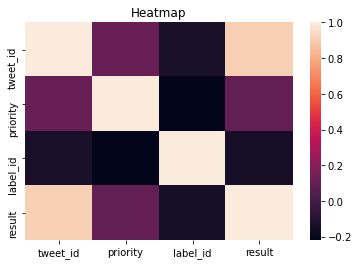

In [11]:
import matplotlib.pyplot as plt


sns.heatmap(df.corr())
plt.title('Heatmap')
plt.savefig('heatmap.png')

In [12]:
df.loc[df['label_id'] == 15.0]



INFO - NumExpr defaulting to 4 threads.


,tweet_id,priority,label_id,result
1,211654415503990784,0.50,15.0,0
2,211681309368655872,0.25,15.0,0
12,212099863171710976,0.25,15.0,0
13,212137133736075264,0.25,15.0,0
24,212298199229149184,0.25,15.0,0
...,...,...,...,...
916,396335979167903744,0.25,15.0,1
917,396336012726525952,0.25,15.0,1
918,396336079856345088,0.25,15.0,1
919,396336243442589696,0.25,15.0,1


In [13]:
df.loc[df['result'] == 0]
#df.describe()


,tweet_id,priority,label_id,result
0,211565974422425600,0.75,19.0,0
1,211654415503990784,0.50,15.0,0
2,211681309368655872,0.25,15.0,0
3,211685621125742592,0.25,16.0,0
4,211877049147736064,0.25,7.0,0
...,...,...,...,...
497,324702723675144192,1.00,6.0,0
498,324705017925861376,0.25,4.0,0
499,324706162983448576,0.50,16.0,0
500,324708104937820160,0.25,15.0,0


In [22]:
feature_vec.head()

feature_vec.loc[feature_vec['tweet_id'] == 1158762608415010800]

,timestamp,tweet_id,positive_sentiment,negative_sentiment,numb_of_questions,numb_of_emoticons,tweet_length,userFollowersCount,userFriendsCount,user_list_count,dict_precision,dict_recall,dict_f_measure
0,2019-08-06 15:31:49,1.158763e+18,3.0,19.0,9.0,0.0,68.0,1592.0,523.0,94.0,20.0,11.11,14.29
251,2019-08-06 15:31:49,1.158763e+18,3.0,19.0,9.0,0.0,68.0,1592.0,523.0,94.0,20.0,11.11,14.29
538,2019-08-06 15:31:49,1.158763e+18,3.0,19.0,9.0,0.0,68.0,1592.0,523.0,94.0,20.0,11.11,14.29
572,2019-08-06 15:31:49,1.158763e+18,3.0,19.0,9.0,0.0,68.0,1592.0,523.0,94.0,20.0,11.11,14.29
859,2019-08-06 15:31:49,1.158763e+18,3.0,19.0,9.0,0.0,68.0,1592.0,523.0,94.0,20.0,11.11,14.29
1146,2019-08-06 15:31:49,1.158763e+18,3.0,19.0,9.0,0.0,68.0,1592.0,523.0,94.0,20.0,11.11,14.29


In [19]:
merged_df = df.merge(feature_vec, how='left', on='tweet_id')


,tweet_id,priority,label_id,result,timestamp,positive_sentiment,negative_sentiment,numb_of_questions,numb_of_emoticons,tweet_length,userFollowersCount,userFriendsCount,user_list_count,dict_precision,dict_recall,dict_f_measure
0,211565974422425600,0.75,19.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
251,243410216681619456,0.50,13.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
538,324731639177564160,0.50,13.0,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
572,324738891120791552,0.25,18.0,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
859,396326609118322688,0.75,14.0,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
merged_df.loc[feature_vec['tweet_id'] == 1158762608415010800]



,tweet_id,priority,label_id,result,timestamp,positive_sentiment,negative_sentiment,numb_of_questions,numb_of_emoticons,tweet_length,userFollowersCount,userFriendsCount,user_list_count,dict_precision,dict_recall,dict_f_measure
0,211565974422425600,0.75,19.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
251,243410216681619456,0.50,13.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
538,324731639177564160,0.50,13.0,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
572,324738891120791552,0.25,18.0,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
859,396326609118322688,0.75,14.0,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
